In [2]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name="Energy_efficiency", version=1, as_frame=True)

df = dataset.frame
print(df.head())

# Basic shape
print("Dataset Shape:", df.shape)

# Number of records and attributes
n_records = df.shape[0]
n_columns = df.shape[1]

print("\nNumber of Records:", n_records)
print("Number of Total Columns:", n_columns)

# Feature names
print("\nColumn Names:")
print(df.columns.tolist())

# Separate features and targets
X = df.iloc[:, :-2]   # First 8 columns are features
Y = df.iloc[:, -2:]   # Last 2 columns are targets

print("\nNumber of Input Features:", X.shape[1])
print("Target Variables:", Y.columns.tolist())

# Data types
print("\nData Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values Per Column:")
print(df.isnull().sum())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())


     X1     X2     X3      X4   X5   X6   X7   X8     Y1
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84
Dataset Shape: (768, 9)

Number of Records: 768
Number of Total Columns: 9

Column Names:
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1']

Number of Input Features: 7
Target Variables: ['X8', 'Y1']

Data Types:
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y1    float64
dtype: object

Missing Values Per Column:
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64

Statistical Summary:
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean 

e:\OneDrive\Desktop\SR\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target safely
X = df.iloc[:, :-2]       # first 8 columns
y = df.iloc[:, -2]        # Heating Load

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("\n==============================")
print("Energy Efficiency Dataset (Heating Load)")
print("==============================")

# -----------------------------
# 1. Linear Regression
# -----------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("\nLinear Regression")
print("R² :", r2_score(y_test, lr_pred))
print("RMSE:", mean_squared_error(y_test, lr_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, lr_pred))

# -----------------------------
# 2. Ridge Regression
# -----------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("\nRidge Regression")
print("R² :", r2_score(y_test, ridge_pred))
print("RMSE:", mean_squared_error(y_test, ridge_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, ridge_pred))

# -----------------------------
# 3. Lasso Regression
# -----------------------------
lasso = Lasso(alpha=0.01, max_iter=5000)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("\nLasso Regression")
print("R² :", r2_score(y_test, lasso_pred))
print("RMSE:", mean_squared_error(y_test, lasso_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, lasso_pred))

# -----------------------------
# 4. Random Forest Regression
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\nRandom Forest Regression")
print("R² :", r2_score(y_test, rf_pred))
print("RMSE:", mean_squared_error(y_test, rf_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, rf_pred))



Energy Efficiency Dataset (Heating Load)

Linear Regression
R² : 0.045774762028534144
RMSE: 1.5103216506066823
MAE : 1.3430185688869596

Ridge Regression
R² : 0.04980635406266032
RMSE: 1.5071277265690475
MAE : 1.3377749191695498

Lasso Regression
R² : 0.05278155050272293
RMSE: 1.5047663570792031
MAE : 1.3351857667501699

Random Forest Regression
R² : 0.02734612435400985
RMSE: 1.5248360798790301
MAE : 1.300863524612931


In [ ]:
import pysr
# pysr.install()



Precompiling PyCall...
Precompiling PyCall... DONE
PyCall is installed and built successfully.
e:\OneDrive\Desktop\SR\venv\lib\site-packages\pysr\julia_helpers.py:105: UserWarning: It is recommended to restart Python after installing PySR's dependencies, so that the Julia environment is properly initialized.
  warnings.warn(


In [9]:
from pysr import PySRRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("\n===================================")
print("Training Symbolic Regression for Energy Efficiency (Heating Load)")
print("===================================")

# Define SR model
sr_model = PySRRegressor(
    niterations=800,                 # moderate search depth
    populations=15,
    population_size=40,
    maxsize=10,                      # control complexity
    binary_operators=["+", "-", "*"],
    unary_operators=["square"],      # useful for physics-like terms
    model_selection="best",
    random_state=42,
    verbosity=1
)

# Train
sr_model.fit(X_train, y_train)

print("\nBest symbolic equation found:")
print(sr_model.get_best())



Training Symbolic Regression for Energy Efficiency (Heating Load)


e:\OneDrive\Desktop\SR\venv\lib\site-packages\pysr\sr.py:1251: UserWarning: Note: Setting `random_state` without also setting `deterministic` to True and `procs` to 0 will result in non-deterministic searches. 
  warnings.warn(
e:\OneDrive\Desktop\SR\venv\lib\site-packages\pysr\sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
e:\OneDrive\Desktop\SR\venv\lib\site-packages\pysr\julia_helpers.py:220: UserWarning: Julia has already started. The new Julia options {'threads': 8} will be ignored.
  warnings.warn(



Best symbolic equation found:
complexity                                                       7
loss                                                        1.9412
score                                                     0.104646
equation             (3.3016555 - square(-0.5488478 * square(x6)))
sympy_format                    3.3016555 - 0.30123390756484*x6**4
lambda_format    PySRFunction(X=>3.3016555 - 0.30123390756484*x...
Name: 3, dtype: object


In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("\n==============================")
print("Energy Efficiency Dataset - Symbolic Regression")
print("==============================")

# Predict using trained SR model
y_pred_sr = sr_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred_sr)
rmse = mean_squared_error(y_test, y_pred_sr, squared=False)
mae = mean_absolute_error(y_test, y_pred_sr)
r2 = r2_score(y_test, y_pred_sr)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)



Energy Efficiency Dataset - Symbolic Regression
MSE : 2.04059983154611
RMSE: 1.4284956533171915
MAE : 1.2459542790242102
R²  : 0.14636964695910348


In [11]:
import pickle

with open("sr_model_energy_heating.pkl", "wb") as f:
    pickle.dump(sr_model, f)

print("Model saved successfully.")

import pickle

print("\n===================================")
print("Energy Efficiency Dataset - Discovered Equations")
print("===================================")

with open("sr_model_energy_heating.pkl", "rb") as f:
    model = pickle.load(f)

# Show top symbolic equations found
print(model.equations_.head())

print("\nBest Equation:")
print(model.get_best()["sympy_format"])

best_eq = model.get_best()

print("\nBest Discovered Equation:")
print("Complexity :", best_eq["complexity"])
print("Loss       :", best_eq["loss"])
print("Equation   :", best_eq["sympy_format"])


Model saved successfully.

Energy Efficiency Dataset - Discovered Equations
   complexity      loss     score  \
0           1  2.404495  0.000000   
1           4  2.255817  0.021276   
2           6  2.155348  0.022780   
3           7  1.941200  0.104646   
4           8  1.861606  0.041866   

                                            equation  \
0                                          2.8000176   
1                           (3.7996342 - square(x6))   
2               (3.4111497 - square(x6 * 0.7820297))   
3      (3.3016555 - square(-0.5488478 * square(x6)))   
4  (3.064492 - (square(square(square(x6))) * 0.03...   

                         sympy_format  \
0                    2.80001760000000   
1                   3.7996342 - x6**2   
2  3.4111497 - 0.61157045168209*x6**2   
3  3.3016555 - 0.30123390756484*x6**4   
4         3.064492 - 0.03360186*x6**8   

                                       lambda_format  
0                  PySRFunction(X=>2.80001760000000)  
1      

e:\OneDrive\Desktop\SR\venv\lib\site-packages\pysr\sr.py:1079: UserWarning: raw_julia_state_ cannot be pickled and will be removed from the serialized instance. This will prevent a `warm_start` fit of any model that is deserialized via `pickle.load()`.
  warnings.warn(


In [12]:
import pickle

bundle = {
    "model": sr_model
}

with open("sr_bundle_energy_heating.pkl", "wb") as f:
    pickle.dump(bundle, f)

print("Bundle saved successfully.")


Bundle saved successfully.


e:\OneDrive\Desktop\SR\venv\lib\site-packages\pysr\sr.py:1079: UserWarning: raw_julia_state_ cannot be pickled and will be removed from the serialized instance. This will prevent a `warm_start` fit of any model that is deserialized via `pickle.load()`.
  warnings.warn(



Plotting results for Energy Efficiency (Heating Load)


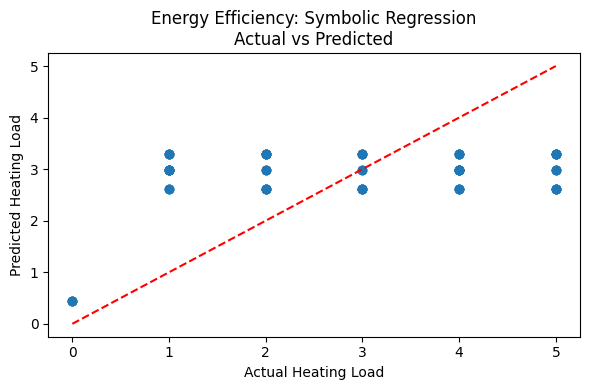

In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

print("\nPlotting results for Energy Efficiency (Heating Load)")

# Load bundle
with open("sr_bundle_energy_heating.pkl", "rb") as f:
    obj = pickle.load(f)

model = obj["model"]

# Predict
y_pred = model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6)

# Perfect prediction reference line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], "r--")

plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Energy Efficiency: Symbolic Regression\nActual vs Predicted")
plt.tight_layout()
plt.show()
